In [52]:
from PIL import Image
import torch
import torch.nn.functional as F
from torchvision.transforms import transforms
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [56]:
raw_images = []

tensor_to_pil = transforms.ToPILImage()
pil_to_tensor = transforms.ToTensor()


for dataset in os.listdir('data/data'):
    for category in os.listdir(f'data/data/{dataset}'):
        
        number_of_images = len(os.listdir(f'data/data/{dataset}/{category}'))
        print(f'{dataset} {category}: {number_of_images}') 

        for image in os.listdir(f'data/data/{dataset}/{category}'):
            file_path = f'data/data/{dataset}/{category}/{image}'
            img_pil = Image.open(file_path)
            mode = img_pil.mode
            format = img_pil.format
            
            img_tensor = pil_to_tensor(img_pil)
            channels = img_tensor.shape[0]
            height = img_tensor.shape[1]
            width = img_tensor.shape[2]

            raw_images.append({"dataset":dataset,
                               "category":category,
                               "image": image,
                               "mode":mode,
                               "format":format,
                               "channels":channels,
                               "width":width,
                               "height":height})
            

raw_images_df = pd.DataFrame(raw_images)

raw_images_df.to_csv("data/raw_images_df.csv")
        

test NORMAL: 234


KeyboardInterrupt: 

In [18]:
raw_images_df["format"].describe()


count     5856
unique       1
top       JPEG
freq      5856
Name: format, dtype: object

In [22]:
raw_images_df["mode"].value_counts()

# If you have an L mode image, that means it is a single channel image - normally interpreted as greyscale. 
# The L means that is just stores the Luminance. It is very compact, but only stores a greyscale, not colour.
# img_pil = img_pil.convert("L")

L      5573
RGB     283
Name: mode, dtype: int64

In [23]:
raw_images_df["channels"].value_counts()

1    5573
3     283
Name: channels, dtype: int64

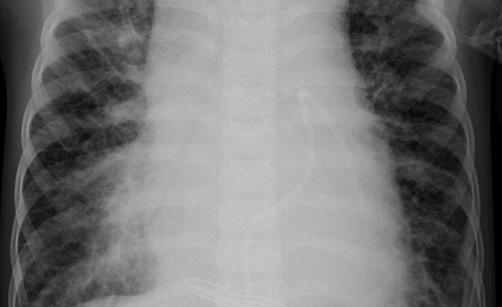

In [50]:
dataset="train"
category="PNEUMONIA"
# image = list(os.listdir(f'data/data/{dataset}/{category}'))[2]
image = "person1010_virus_1695.jpeg"
file_path = f'data/data/{dataset}/{category}/{image}'
img_pil = Image.open(file_path).convert("L")
img_pil

,height,width
count,5856.000000,5856.000000
mean,970.689037,1327.880806
std,383.392117,363.500922
min,127.000000,384.000000
25%,688.000000,1056.000000
50%,888.000000,1281.000000
75%,1187.000000,1560.000000
max,2713.000000,2916.000000


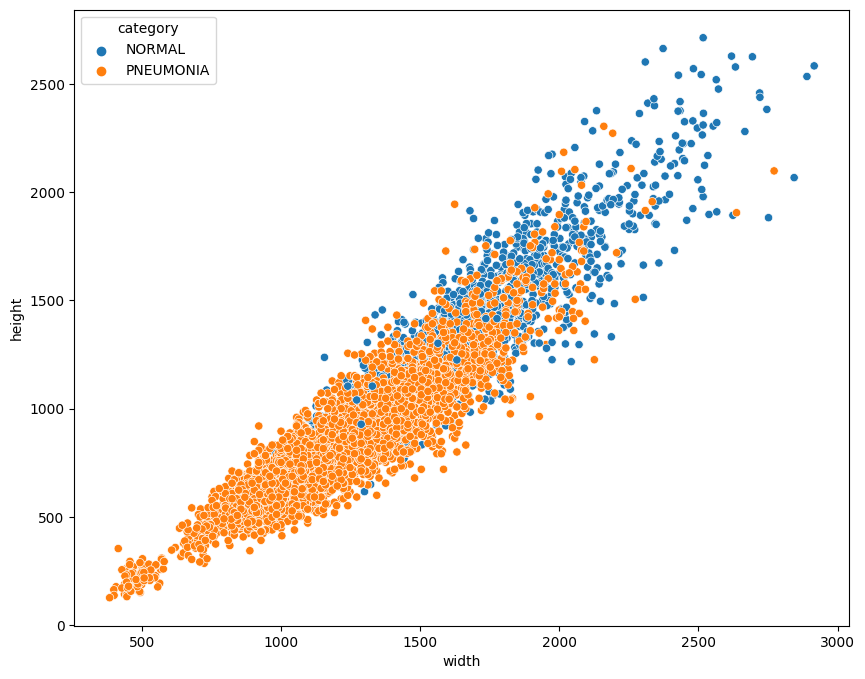

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=raw_images_df, x="width", y="height", hue="category")
raw_images_df[["height","width"]].describe()